In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px
from utils import  *
from scipy.signal import savgol_filter, find_peaks



<Axes: xlabel='timestamp'>

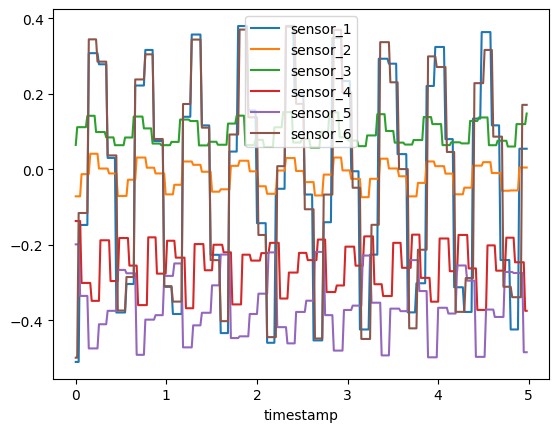

In [44]:
df = pd.read_csv("data/230706(2)/3_0_[0.79023691 0.9448353  0.43728169]_0.5649264286671019.csv")
df.plot(x='timestamp')

<Axes: xlabel='timestamp'>

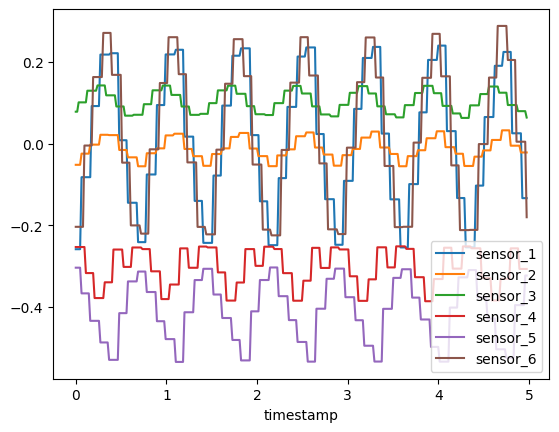

In [42]:
df = pd.read_csv("data/230706(2)/1_4_[0.04920672 0.12295321 0.24882862]_0.5902951389230567.csv")
df.plot(x='timestamp')

In [35]:
abs(((df.drop('timestamp', axis=1).max()+df.drop('timestamp', axis=1).min())/2))

sensor_1    0.027613
sensor_2    0.015126
sensor_3    0.100286
sensor_4    0.311661
sensor_5    0.423833
sensor_6    0.032436
dtype: float64

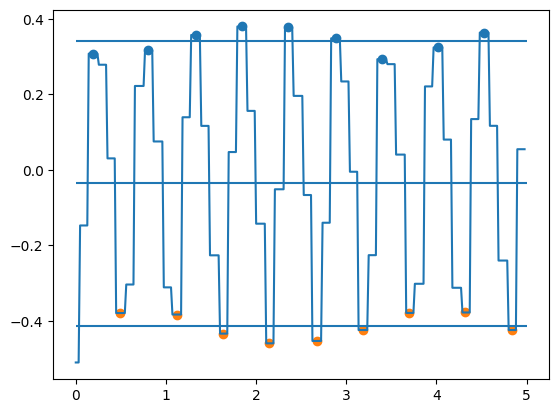

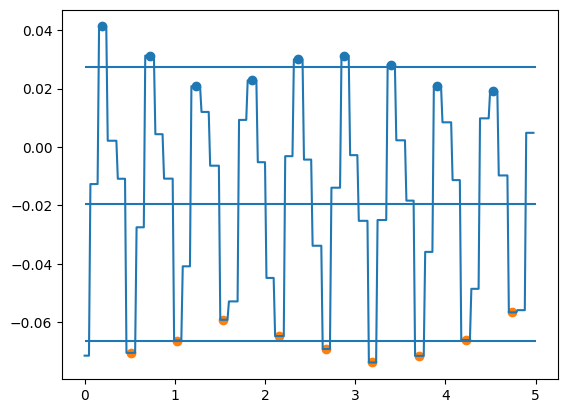

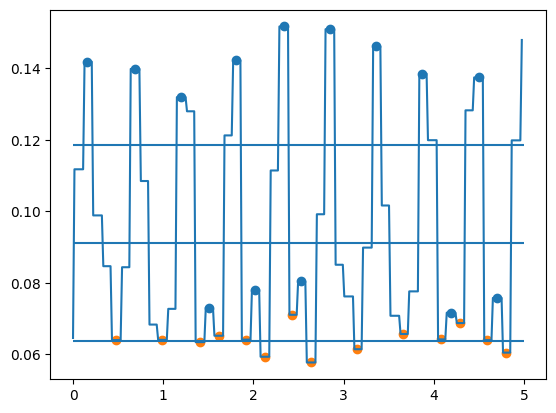

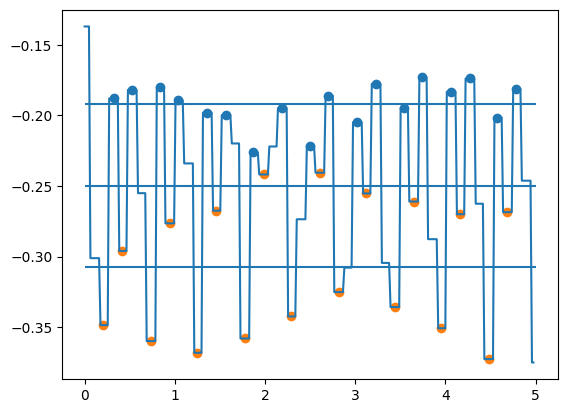

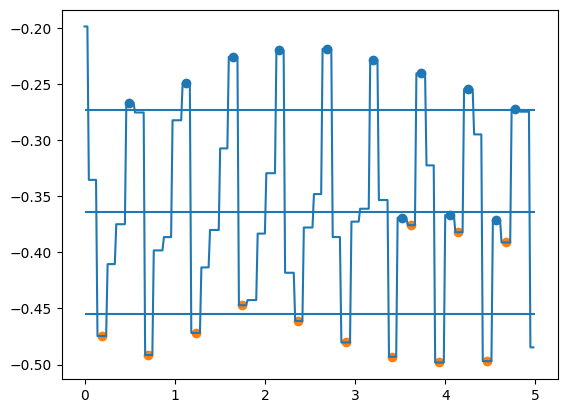

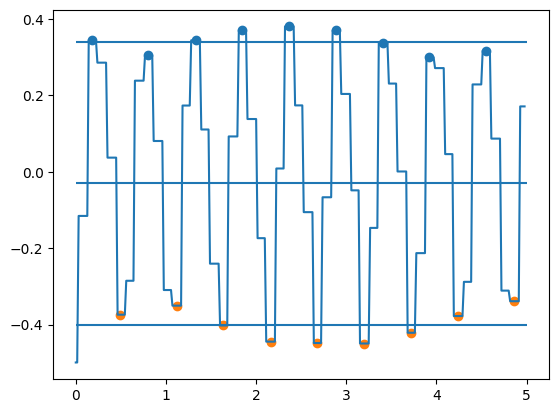

In [45]:
for sensor in [f'sensor_{i}' for i in range(1,7)]:
    peaks, _ = find_peaks(df[sensor])
    valleys, _ = find_peaks(-df[sensor])
    max = df[sensor][peaks].mean()
    min = df[sensor][valleys].mean()
    avg = (max+min)/2
    plt.plot(df.timestamp,df[sensor])
    plt.hlines(avg,0,5)
    plt.hlines(max,0,5)
    plt.hlines(min,0,5)
    plt.scatter(df.timestamp[peaks],df[sensor][peaks])
    plt.scatter(df.timestamp[valleys],df[sensor][valleys])
    plt.show()